# 1. Read Dataset

In [1]:
# Read all the data from csv file
def read_dataset(file_path="Data/dataset.csv"):
    import pandas as pd
    names = ['airline_sentiment', 'text']
    data = pd.read_csv(file_path, names = names, header=0)
    return data

In [2]:
def read_train_test_data(dir='Data'):
    train_data = read_dataset(dir + "/train.csv")
    test_data = read_dataset(dir + "/test.csv")
    return train_data, test_data

In [3]:
def sep_text_sentiment(data):
    return data.iloc[:, 1].values.tolist(), data.iloc[:, 0].values.tolist()

In [4]:
def save_cleaned_data(texts, sent, path="Data/cleaned_data.csv"):
    import pandas as pd
    df = pd.DataFrame({'airline_sentiment': sent, 'text': texts})
    df.to_csv(path, index=False)

# 2. Data Cleaning

In [5]:
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/usama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2.1. Remove hashtags

In [6]:
# Remove the hashtags from the data #xyz
def remove_hashtags(data):
    return [re.sub(r'#\w+ ?', '', text) for text in data]

### 2.2. Remove User mentions

In [7]:
# Remove the user mentions from the data @xyz
def remove_um(data):
    return [re.sub(r'@\w+ ?', '', text) for text in data]

### 2.3. Remove urls

In [8]:
# Remove the urls from the data
def remove_urls(data):
    return [re.sub(r'http\S+', '', text) for text in data]

### 2.4. Remove Stop words

In [9]:
def rem_stop_words(data):
    return [" ".join(text for text in text.split() if text not in stop) for text in data]

### 2.5. Remove Punctuations

In [10]:
def rem_punc(data):
    return [re.sub(r'[^\w\s]', '', text) for text in data]

### 2.6. Remove numbers

In [11]:
def rem_nums(data):
    return [re.sub('\d+', '', text) for text in data]
    

### 2.7 Lower case data 

In [12]:
def lower(data):
    return [text.lower() for text in data]

### 2.8. Apply all to clean data

In [13]:
def clean_data(data):
    data = remove_hashtags(data)
    data = remove_um(data)
    data = remove_urls(data)
#     data = rem_stop_words(data)
    data = rem_punc(data)
    data = rem_nums(data)
    data = lower(data)
    return data

In [14]:
def tfidf_vec(data):
    from sklearn.feature_extraction.text import TfidfVectorizer
    
    # create the transform
    vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8)
    # Tokenize and build
    return vectorizer.fit_transform(data).toarray()

In [15]:
def get_input():
    return input("Enter Your tweet: ")

In [16]:
def save_model(model, file='finalized_model.sav'):
    import pickle
    pickle.dump(model, open(file, 'wb'))

In [17]:
def load_model(file='finalized_model.sav'):
    import pickle
    return pickle.load(open(file, 'rb'))

In [18]:
def accuracy(y_test, y_pred):
    count = 0.0
    for i in range(len(y_test)):
        if y_pred[i] == y_test[i]:
            count += 1

    return count/len(y_test)

In [19]:
def rand_test(data, X_test, y_pred, features_nd, n):
    import random
    j = random.randint(0,(len(X_test))-n)
    for i in range(j,j+n):
        ind = features_nd.tolist().index(X_test[i].tolist())
        print("Tweet: ", end="")
        print(data[ind])
        print("Prediction: ", end="")
        print(y_pred[i])

In [20]:
def sentiment_(n):
    if n == 0:
        return "Negative"
    elif n == 1:
        return "Positive"
    else:
        return "Netural"

In [21]:
def main():
    from sklearn.model_selection import train_test_split
#     # Reading Dataset
#     dataset = read_dataset()
#     texts, sent = sep_text_sentiment(dataset)

#     # Cleaning Data
#     data = clean_data(texts)
    
#     # Save The cleaned Data
#     save_cleaned_data(data, sent)
    
    # Load The cleaned Data
    dataset = read_dataset("Data/cleaned_data.csv")
    data, sent = sep_text_sentiment(dataset)
    
    # Text Embedding
    from sklearn.feature_extraction.text import HashingVectorizer
    vectorizer = HashingVectorizer(n_features=10000)
    # Fit the data to model
    features = vectorizer.fit_transform(data)
    features_nd = features.toarray() # for easy usage
    
    from sklearn.model_selection import train_test_split
    # Split the data
    X_train, X_test, y_train, y_test  = train_test_split(
        features_nd, 
        sent,
        train_size=0.80, 
        random_state=1234, 
        stratify=sent)
    # Train the model 
    ## Uncomment these commented lines if this is the first time to run this program
#     from sklearn.ensemble import RandomForestClassifier
#     text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
#     text_classifier.fit(X=X_train, y=y_train)
    
#     save_model(text_classifier) # Save Model
    
    text_classifier = load_model() # Load Model
    
    y_pred = text_classifier.predict(X_test)
    print("Testing Accuracy: ", end="")
    print(accuracy(y_test, y_pred), end="\n\n")
    
    # Random Test
#     rand_test(data, X_test, y_pred, features_nd, 5)
    
    # Test From Input
    while True:
        text = get_input()
        if text == '0':
            break
        text = clean_data([text])
#         print(text)
        vec = vectorizer.fit_transform(text)
        pred = text_classifier.predict(vec)[0]
        
        
        print(sentiment_(pred))


In [22]:
# if __name__ == "__main__":
#     main()

In [23]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [24]:
# Load The cleaned Data
dataset = read_dataset("Data/cleaned_data.csv")
data, sent = sep_text_sentiment(dataset)

In [72]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer(n_features=10000)
# Fit the data to model
features = vectorizer.fit_transform(data)
features_nd = features.toarray() # for easy usage

X_train, X_test, y_train, y_test  = train_test_split(
        features_nd,
        sent,
        train_size=0.80, 
        random_state=1234, 
        stratify=sent)

In [71]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

model = Sequential()

model.add(Embedding(5000, 32, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrices=['acc'])
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
lstm_14 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
model.fit(X_train, y_train, epochs=3, batch_size=64)

/home/usama/.local/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


ValueError: Session keyword arguments are not support during eager execution. You passed: {'metrices': ['acc']}

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(dataset['text'].values)
X = tokenizer.texts_to_sequences(dataset['text'].values)
X = sequence.pad_sequences(X)

In [66]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 30, 128)           256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 30, 128)           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 196)               254800    
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [67]:
# import pandas as pd
# Y = pd.get_dummies(sent).values
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
# print(X_train.shape,Y_train.shape)
# print(X_test.shape,Y_test.shape)

(9808, 30) (9808, 3)
(4832, 30) (4832, 3)


In [70]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 3, batch_size=batch_size, verbose = 2)

ValueError: Error when checking target: expected dense_12 to have shape (1,) but got array with shape (3,)

### Tokenize -> Create Vocab to Int mapping dictionary

In [25]:
from collections import Counter
all_text2 = ' '.join(data)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)
total_words = len(words)
sorted_words = count_words.most_common(total_words)

### create a vocab to int mapping dictionary

In [40]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

### Tokenize — Encode the words

In [46]:
tweets_int = []
for tweet in data:
    r = [vocab_to_int[w] for w in tweet.split()]
    tweets_int.append(r)
print (tweets_int[0:3])

[[52, 209], [521, 508, 1065, 2263, 1, 2, 190, 5444], [3, 181, 91, 728, 535, 3, 69, 1, 138, 136, 185]]


In [49]:
import numpy as np
sentiments = np.array(sent)

### Analyze Tweets Length

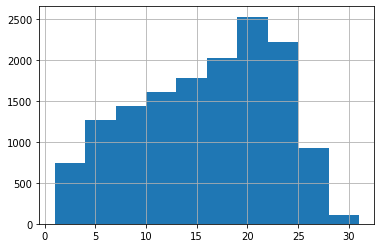

count    14640.000000
mean        15.365574
std          6.853783
min          1.000000
25%         10.000000
50%         16.000000
75%         21.000000
max         31.000000
dtype: float64

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
tweets_len = [len(x) for x in tweets_int]
pd.Series(tweets_len).hist()
plt.show()
pd.Series(tweets_len).describe()

### Removing Outliers — Getting rid of extremely long or short tweets

In [103]:
tweets_int = [ tweets_int[i] for i, l in enumerate(tweets_len) if l>0 ]
encoded_labels = [ sentiments[i] for i, l in enumerate(tweets_len) if l> 0 ]

### Padding / Truncating the remaining data

**To deal with both short and long reviews, we will pad or truncate all our reviews to a
specific length. We define this length by Sequence Length. This sequence length is
same as number of time steps for LSTM layer.**

In [62]:
def pad_features(tweets_int, seq_length):
    ''' Return features of review_ints, where each review is padded
    with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(tweets_int), seq_length), dtype = int)
    for i, tweet in enumerate(tweets_int):
        tweet_len = len(tweet)
        if tweet_len <= seq_length:
            zeroes = list(np.zeros(seq_length-tweet_len))
            new = zeroes+tweet
        elif tweet_len > seq_length:
            new = tweet[0:seq_length]
        features[i,:] = np.array(new)
    return features

In [71]:
seq_length=200
features = pad_features(tweets_int, seq_length)

### Training, Validation, Test Dataset Split

In [83]:
split_frac = 0.8
len_feat = len(data)
train_x = features[0:int(split_frac*len_feat)]
train_y = encoded_labels[0:int(split_frac*len_feat)]
remaining_x = features[int(split_frac*len_feat):]
remaining_y = encoded_labels[int(split_frac*len_feat):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

### Dataloaders and Batching

In [104]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

ModuleNotFoundError: No module named 'torch'

###  Define the LSTM Network Architecture

### Define the Model Class

In [93]:
import torch.nn as nn
class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()


ModuleNotFoundError: No module named 'torch'

In [95]:
def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden

In [96]:
def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

### Training the Network

In [98]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

NameError: name 'SentimentLSTM' is not defined

In [99]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                inputs = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

NameError: name 'nn' is not defined

### Testing

In [101]:
from string import punctuation

def tokenize_review(test_review):
    test_review = test_review.lower() # lowercase
    # get rid of punctuation
    test_text = ''.join([c for c in test_review if c not in punctuation])

    # splitting by spaces
    test_words = test_text.split()

    # tokens
    test_ints = []
    test_ints.append([vocab_to_int[word] for word in test_words])

    return test_ints

# test code and generate tokenized review
test_ints = tokenize_review(test_review_neg)
print(test_ints)


# test sequence padding
seq_length=200
features = pad_features(test_ints, seq_length)

print(features)


# test conversion to tensor and pass into your model
feature_tensor = torch.from_numpy(features)
print(feature_tensor.size())


def predict(net, test_review, sequence_length=200):
    
    net.eval()
    
    # tokenize review
    test_ints = tokenize_review(test_review)
    
    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)
    
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    h = net.init_hidden(batch_size)
    
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    
    # get the output from the model
    output, h = net(feature_tensor, h)
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    
    # print custom response
    if(pred.item()==1):
        print("Positive review detected!")
    else:
        print("Negative review detected.")

NameError: name 'test_review_neg' is not defined